# LKF Detection

In [2]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import os
import xarray as xr
from pathlib import Path
from lkf_tools.dataset import *
import warnings
warnings.filterwarnings('ignore')

In [208]:
base_path = '/work/bk1377/a270230/'

path_ice  = base_path + 'interpolated_fesom_output/'
path_lkfs = base_path + 'lkfs/daily_data/'
path_ds   = base_path + 'lkf_datasets/daily_data/'

#files = os.listdir(path_ice)
#files.sort()
#files

In [209]:
file = 'ice_2020.nc'

In [210]:
lkf_data = process_dataset(path_ice + file, output_path=path_lkfs, dog_thres=0.05, t_red=1, lmin=5)

  -->  Compute dxu and dyu from lon,lat using SSMI projection


In [211]:
lkf_data.detect_lkfs(indexes=np.arange(365,366))

Compute deformation rates and detect features for day 366
Start detection routines


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [212]:
lkf_data.indexes = np.arange(366)

In [213]:
np.save(path_ds + 'ds_2020', [lkf_data], allow_pickle=True)

In [6]:
files = ['ice_2013.nc']

In [ ]:
%%time
for file in files:
    
    lkf_data = process_dataset(path_ice + file, output_path=path_lkfs, dog_thres=0.01, t_red=1, lmin=5)
    
    ntimesteps = len(xr.open_dataset(path_ice + file).time)
    
    lkf_data.detect_lkfs(indexes = np.arange(0,ntimesteps,7))
    
    np.save(path_ds + 'ds_2013_d0.01', [lkf_data], allow_pickle=True)    

  -->  Compute dxu and dyu from lon,lat using SSMI projection
Compute deformation rates and detect features for day 1
Start detection routines


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


Compute deformation rates and detect features for day 8
Start detection routines
Compute deformation rates and detect features for day 15
Start detection routines
Compute deformation rates and detect features for day 22
Start detection routines
Compute deformation rates and detect features for day 29
Start detection routines
Compute deformation rates and detect features for day 36
Start detection routines
Compute deformation rates and detect features for day 43
Start detection routines
Compute deformation rates and detect features for day 50
Start detection routines
Compute deformation rates and detect features for day 57
Start detection routines
Compute deformation rates and detect features for day 64
Start detection routines
Compute deformation rates and detect features for day 71
Start detection routines
Compute deformation rates and detect features for day 78
Start detection routines
Compute deformation rates and detect features for day 85
Start detection routines
Compute deformati

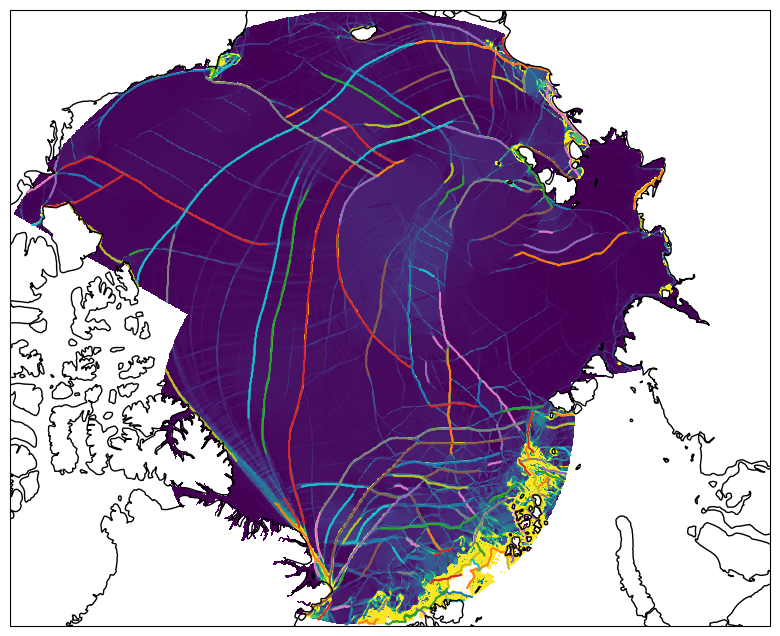

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

fig = plt.figure(figsize=[16, 8])

ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))

ax.coastlines(zorder=3)

it = lkf_data.indexes[0]

pcm = ax.pcolormesh(lkf_data.lon[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                       max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
              lkf_data.lat[max([0,lkf_data.index_y[0][0]-1]):lkf_data.index_y[0][-1]+2:lkf_data.red_fac,
                       max([0,lkf_data.index_x[0][0]-1]):lkf_data.index_x[0][-1]+2:lkf_data.red_fac],
              lkf_data.calc_eps_tot(it),transform=ccrs.PlateCarree(),vmin=0,vmax=0.4)

lkfs = np.load(lkf_data.lkfpath.joinpath('lkf_%s_%03i.npy' %(lkf_data.netcdf_file.split('/')[-1].split('.')[0],(it+1))),allow_pickle=True)

for ilkf in lkfs:
    if np.min(ilkf[:,2])<-150 and np.max(ilkf[:,2]>150):
        ilkf[ilkf[:,2]<0,2]+=360
    ax.plot(ilkf[:,2],ilkf[:,3],transform=ccrs.PlateCarree())